In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# our classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# our measurements
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter


# for visualization
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Pro\Forecasting Diabetes Risk\diabetes.csv")

# Explore Data

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.shape

(768, 9)

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.duplicated().sum()

0

In [10]:
# finding missing values
print(data[data['BloodPressure']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

35
5
227
374
11


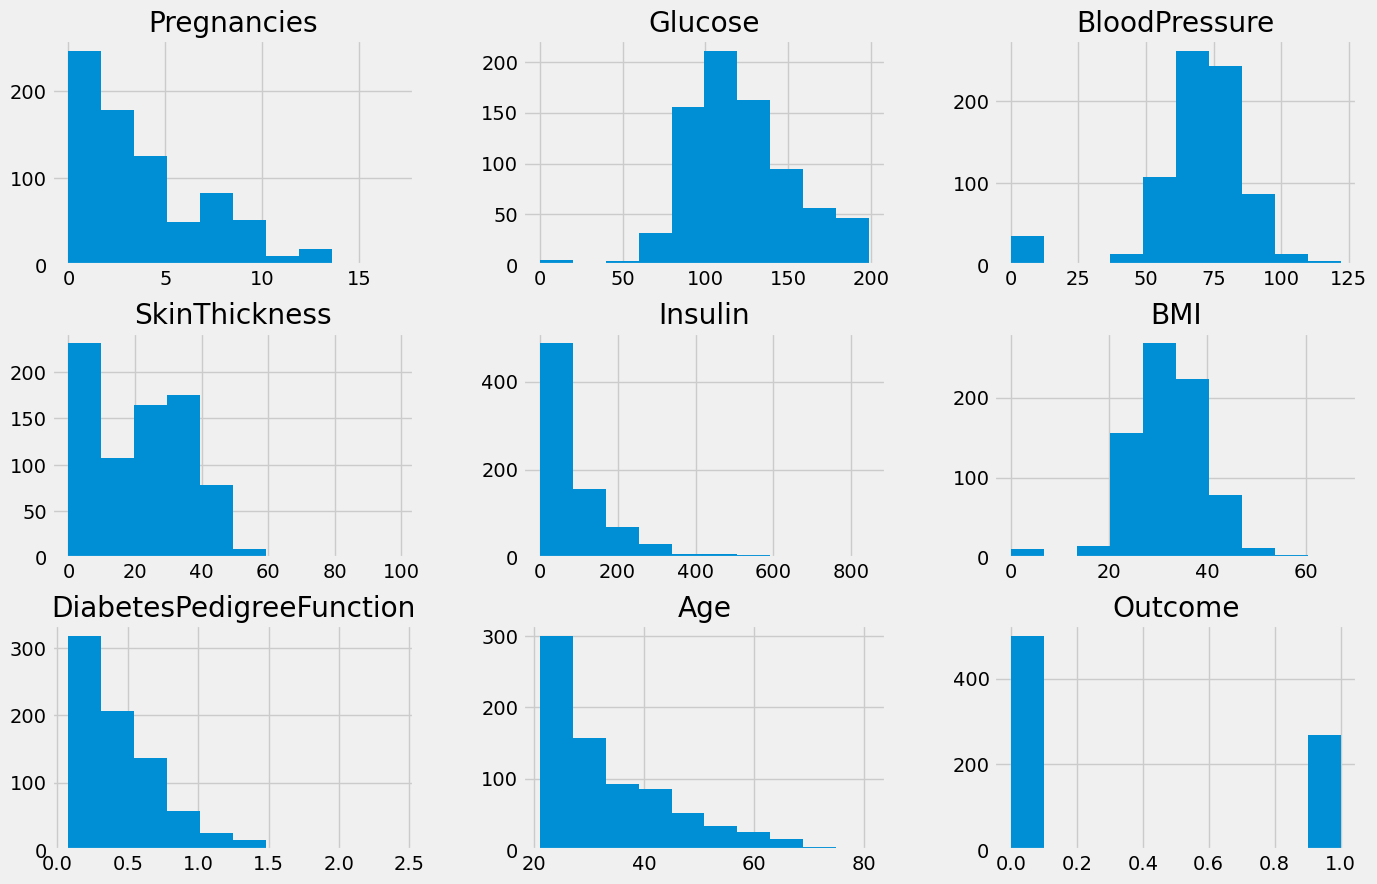

In [11]:
data.hist(bins= 10, figsize=(15,10))
plt.show()

In [12]:
# normal distribution
data['Glucose']= data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']= data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']= data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']= data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']= data['BMI'].replace(0,data['BMI'].mean())

# Analysis

In [14]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<Axes: >

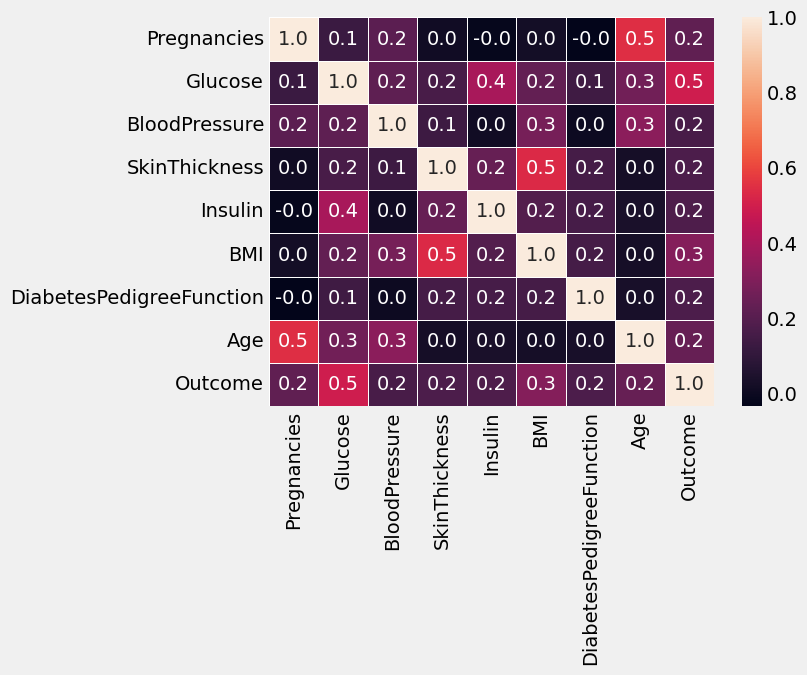

In [15]:
sns.heatmap(data.corr(), annot=True, fmt='0.1f', linewidth=.5)

# Feature Selecting

In [17]:
data= data.drop('Insulin', axis= 1)

# Exploring Data Balance

<Axes: xlabel='Outcome', ylabel='count'>

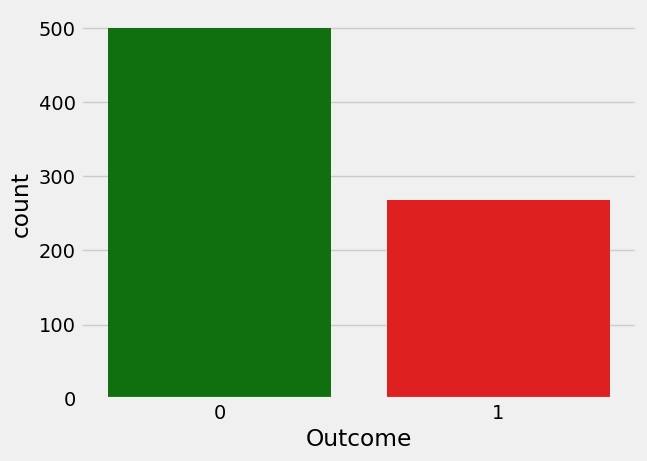

In [19]:
sns.countplot(x='Outcome', data=data, palette= ['g','r'])

In [20]:
max= data[data['Outcome']== 0]
min= data[data['Outcome']== 1]

In [21]:
max.shape

(500, 8)

In [22]:
min.shape

(268, 8)

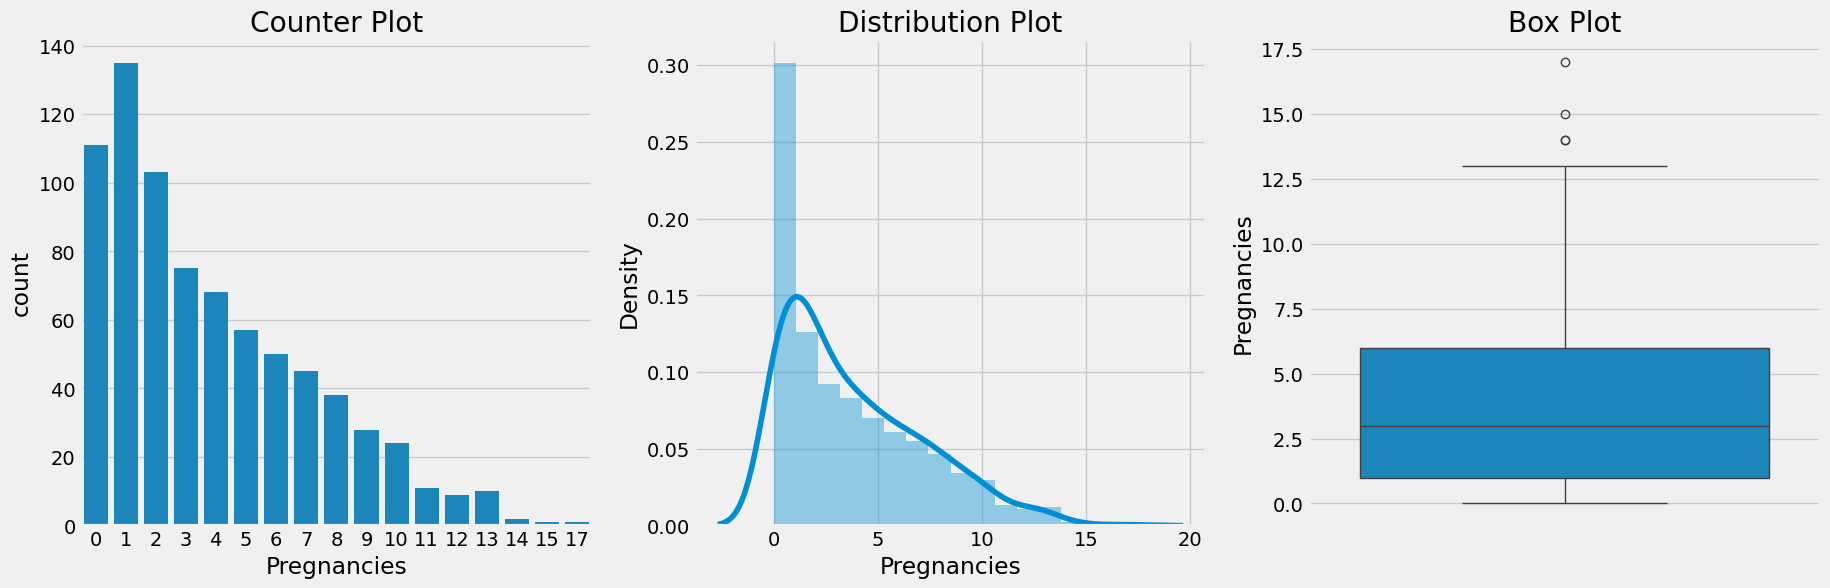

In [23]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x= "Pregnancies",data = data)


plt.subplot(1,3,2)
plt.title("Distribution Plot")
sns.distplot(data["Pregnancies"])

plt.subplot(1,3,3)
plt.title("Box Plot")
sns.boxplot(y=data["Pregnancies"])

plt.show()

# Exploring Data Outliers

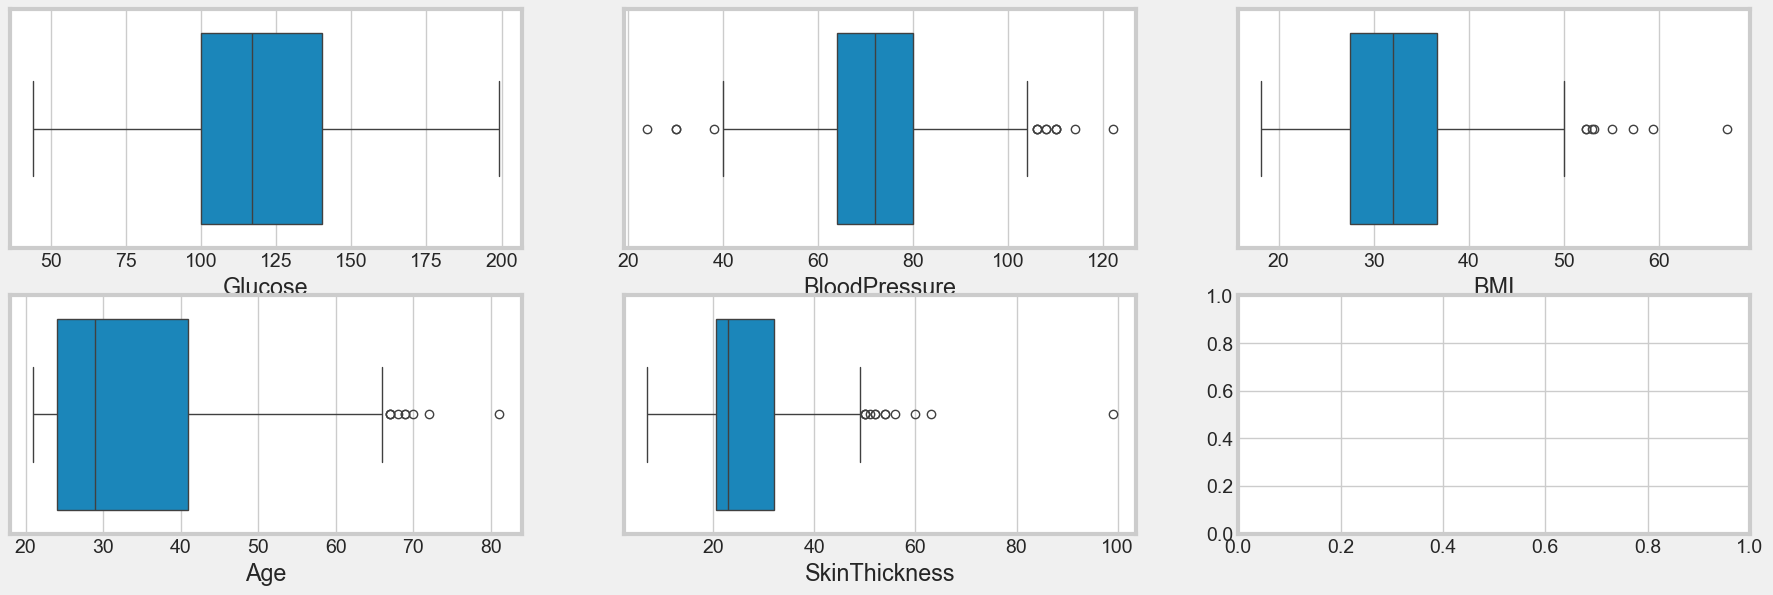

In [25]:
# plt.figure(figsize= (20,10))
# sns.set_style(style= 'Whitegrid')

# plt.subplot(3,3,1)
# sns.boxplot(x='Glucose' , data=data)

# plt.subplot(3,3,2)
# sns.boxplot(x='BloodPressure' , data=data)

# plt.subplot(3,3,3)
# sns.boxplot(x='BMI' , data=data)

# plt.subplot(3,3,4)
# sns.boxplot(x='Age' , data=data)

# plt.subplot(3,3,5)
# sns.boxplot(x='SkinThickness' , data=data)

# # plt.subplot(3,3,6)
# # sns.boxplot(x='SkinThickness' , data=data)   

# plt.subplot(3,3,6)
# plt.show()


# Correcting the style name to 'whitegrid'
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')  # Corrected to 'whitegrid'

# Subplots for the boxplots
plt.subplot(3, 3, 1)
sns.boxplot(x='Glucose', data=data)

plt.subplot(3, 3, 2)
sns.boxplot(x='BloodPressure', data=data)

plt.subplot(3, 3, 3)
sns.boxplot(x='BMI', data=data)

plt.subplot(3, 3, 4)
sns.boxplot(x='Age', data=data)

plt.subplot(3, 3, 5)
sns.boxplot(x='SkinThickness', data=data)

# Ensure the last subplot is shown without an empty box
plt.subplot(3, 3, 6)
plt.show()

<Axes: ylabel='Age'>

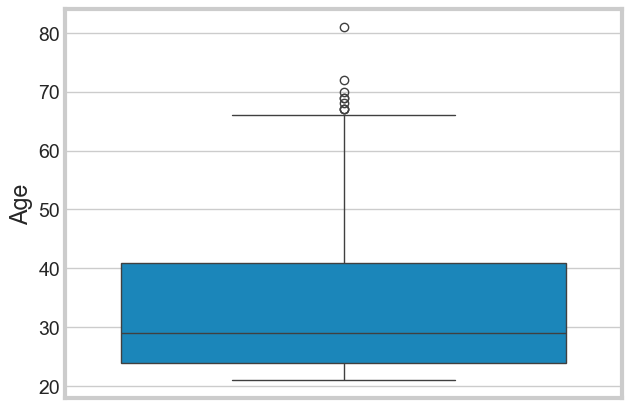

In [26]:
sns.boxplot(data.Age)

# Creat Model

In [28]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [29]:
rm= RandomOverSampler(random_state= 41)
x_res, y_res= rm.fit_resample(x,y)

In [30]:
print('Old Data'.format(Counter(y)))
print('New Data'.format(Counter(y_res)))

Old Data
New Data


In [31]:
x_train, x_test, y_train , y_test= train_test_split(x,y,test_size=0.2)

In [32]:
model1= LogisticRegression()
model2= SVC()
model3= RandomForestClassifier(n_estimators=100,class_weight='balanced')
model4= GradientBoostingClassifier(n_estimators=1000)

In [33]:
col = ['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

In [34]:
accuracy_score, recall_score, f1_score
def cal(model):
    model.fit(x_train, y_train)
    pre= model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)

    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    
    
    #sns.heatmap(confusion_matrix(pre, y_test),annot= True)
    print(model)
    print('accuracy is :',accuracy , 'recall is :',recall, 'F1 : ',f1 )

In [35]:
cal(model1)
cal(model2)
cal(model3)
cal(model4)

LogisticRegression()
accuracy is : 0.7142857142857143 recall is : 0.6304347826086957 F1 :  0.5686274509803921
SVC()
accuracy is : 0.7077922077922078 recall is : 0.6486486486486487 F1 :  0.5161290322580645
RandomForestClassifier(class_weight='balanced')
accuracy is : 0.6948051948051948 recall is : 0.6046511627906976 F1 :  0.5252525252525253
GradientBoostingClassifier(n_estimators=1000)
accuracy is : 0.6688311688311688 recall is : 0.5555555555555556 F1 :  0.49504950495049505


In [36]:
FinalResult= pd.DataFrame({'Algorithm': col, 'Accuracy':result1, 'Recall':result2, 'FScore':result3 })

In [37]:
FinalResult

,Algorithm,Accuracy,Recall,FScore
0,LogisticRegression,0.714286,0.630435,0.568627
1,SVC,0.707792,0.648649,0.516129
2,RandomForestClassifier,0.694805,0.604651,0.525253
3,GradientBoostingClassifier,0.668831,0.555556,0.495050


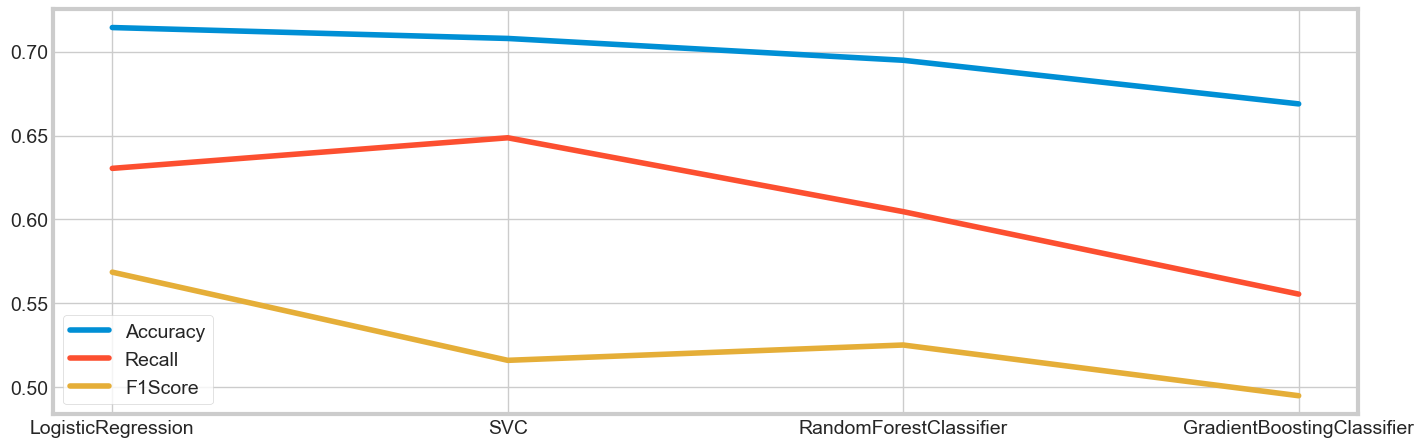

In [38]:
fig, ax=plt.subplots(figsize=(15,5))
plt.plot(FinalResult.Algorithm,result1,label='Accuracy')
plt.plot(FinalResult.Algorithm,result2,label='Recall')
plt.plot(FinalResult.Algorithm,result3,label='F1Score')

plt.legend()
plt.show()

# using my model to predict new data

In [40]:
import pickle

In [41]:
filename= 'Diabetes_prediction.sav'
pickle.dump(model3,open(filename,'wb'))